Name : Mai Phuong Nguyen

Student ID: 587089



# Lab 2 :  Recurrent Neural Networks Task


**For each task, train and validate the following models**

1.  RNN - the simplest RNN architecture implemented and trained by yourself from scratch.
2.   GRU - GRU net implemented and trained by yourself from scratch.     Hint: try 2 GRU layers
3. LSTM - GRU net implemented and trained by yourself from scratch.      Hint: try 2 LSTM layers

Perform sentiment analysis to predict the sentiments
concerning overall satisfaction, side effects, and effectiveness of user reviews on specific drugs.



**Predict overall rating (druglib.com)**
- RNN
- GRU
- LSTM

**Predict effectiveness/Benefits (druglib.com)**
- RNN
- GRU
- LSTM


**Required outcomes (Jupyter Notebook):**

- Trained models: 6 models (2 RNN, 2 GRU, 2 LSTM) for 2 objectives (predict overall rating, predict effectiveness)

- For every model: the following metrics are calculated/plotted: accuracy, balanced_accuracy, f1, roc_auc, precision, recall, and confusion matrix. For more details, please check:  Metrics and scoring: quantifying the quality of predictions

- For every model/experiment: Learning curves for the loss function (weighted kappa, BinaryLogLoss, or CategoricalCrossEntropy) are plotted. The train learning curves must be in blue and the test curves must be in red.

In [19]:
!pip install keras

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Reading the data and prepare them

In [22]:
df_train = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')
df_test = pd.read_csv('drugLibTest_raw.tsv', sep='\t')


df_train['commentsReview'] = df_train['commentsReview'].astype(str).fillna('')
df_test['commentsReview'] = df_test['commentsReview'].astype(str).fillna('')

X_train = df_train['commentsReview']
y_train_rating = df_train['rating']
y_train_effectiveness = df_train['effectiveness']

X_test = df_test['commentsReview']
y_test_rating = df_test['rating']
y_test_effectiveness = df_test['effectiveness']

df_test.head(5)




,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


# 2. Label Encoding


In [23]:
le_rating = LabelEncoder()
y_train_rating = le_rating.fit_transform(y_train_rating)
y_test_rating = le_rating.transform(y_test_rating)

le_effectiveness = LabelEncoder()
y_train_effectiveness = le_effectiveness.fit_transform(y_train_effectiveness)
y_test_effectiveness = le_effectiveness.transform(y_test_effectiveness)

# 3. Tokenize and convert our data to sequences (-> RNNs work better with sequences) and pad them

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

vocab_size = len(tokenizer.word_index) + 1

# 4. Building first simple RNN

In [25]:
def create_rnn_model(in_leng, vocab_size, output):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=in_leng),
        SimpleRNN(128, return_sequences=False),
        Dense(output, activation='softmax' if output > 1 else 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' if output > 1 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# 5. GRU Model

In [26]:
def create_gru_model(in_leng, vocab_size, output):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=in_leng),
        GRU(128, return_sequences=True),
        GRU(128),
        Dense(output, activation='softmax' if output > 1 else 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' if output > 1 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# 6. LSTM Model

In [27]:
def create_lstm_model(in_leng, vocab_size, output):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=in_leng),
        LSTM(128, return_sequences=True),
        LSTM(128),
        Dense(output, activation='softmax' if output > 1 else 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' if output > 1 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# 7. Train all models

In [28]:
models = {
    'rnn_rating': create_rnn_model(100, vocab_size, len(le_rating.classes_)),
    'gru_rating': create_gru_model(100, vocab_size, len(le_rating.classes_)),
    'lstm_rating': create_lstm_model(100, vocab_size, len(le_rating.classes_)),
    'rnn_effectiveness': create_rnn_model(100, vocab_size, len(le_effectiveness.classes_)),
    'gru_effectiveness': create_gru_model(100, vocab_size, len(le_effectiveness.classes_)),
    'lstm_effectiveness': create_lstm_model(100, vocab_size, len(le_effectiveness.classes_))
}

iteration_history = {}
for rnn_mod, model in models.items():
    if 'rating' in rnn_mod:
        iteration_history[rnn_mod] = model.fit(X_train_pad, y_train_rating, epochs=10, validation_data=(X_test_pad, y_test_rating))
    else:
        iteration_history[rnn_mod] = model.fit(X_train_pad, y_train_effectiveness, epochs=10, validation_data=(X_test_pad, y_test_effectiveness))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.1924 - loss: 2.1698 - val_accuracy: 0.2181 - val_loss: 2.2031
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.3548 - loss: 1.9116 - val_accuracy: 0.1931 - val_loss: 2.2243
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.6184 - loss: 1.3608 - val_accuracy: 0.1660 - val_loss: 2.4009
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8824 - loss: 0.5913 - val_accuracy: 0.1882 - val_loss: 2.6588
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.9469 - loss: 0.2916 - val_accuracy: 0.1892 - val_loss: 2.9057
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9710 - loss: 0.1506 - val_accuracy: 0.1757 - val_loss: 3.0893
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9720 - loss: 0.1245 - val_accuracy: 0.1660 - val_loss: 3.3589
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9851 - loss: 0.0761 - val_accuracy: 0.1

# 8. Create Function to evaluate the models

In [29]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    if y_pred.shape[1] > 1:
        # Multi-class classification
        y_pred_classes = y_pred.argmax(axis=1)
        roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')
    else:
        # Binary classification
        y_pred_classes = (y_pred > 0.5).astype("int32")
        roc_auc = roc_auc_score(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred_classes)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_test, y_pred_classes)

    return accuracy, balanced_accuracy, f1, roc_auc, precision, recall, cm

# 9. Create Function to plot learning curves

In [30]:
def plot_learning_curves(history, rnn_mod):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.iteration_history['loss'], label='train loss', color='blue')
    plt.plot(history.iteration_history['val_loss'], label='val loss', color='red')
    plt.title(f'{rnn_mod} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.iteration_history['accuracy'], label='train accuracy', color='blue')
    plt.plot(history.iteration_history['val_accuracy'], label='val accuracy', color='red')
    plt.title(f'{rnn_mod} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 10. start evaluating process

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


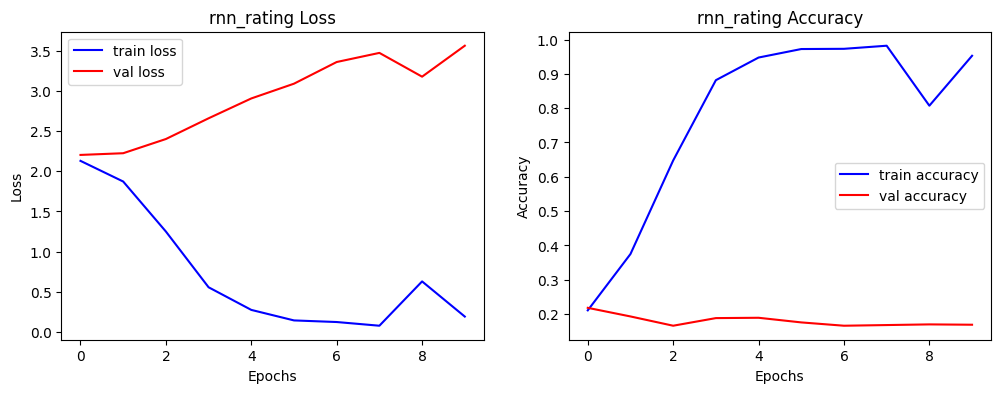

rnn_rating Metrics:
Accuracy: 0.16891891891891891
Balanced Accuracy: 0.12604486649843472
F1 Score: 0.16342927081873515
ROC AUC: 0.5331899505526367
Precision: 0.16394507678436857
Recall: 0.16891891891891891
Confusion Matrix:
[[14  7  3  4  5  2 18 25 13 24]
 [ 1  0  0  0  3  0  6  9 10  4]
 [ 6  2  5  1  0  2  6 10  8  9]
 [ 5  0  5  3  0  2  7  8  6  8]
 [ 6  2  0  1  5  1  4 22  5 21]
 [ 6  1  1  0  3  5  5 15  5 17]
 [ 9  4  4  2  8  0 18 33 18 25]
 [15  5  3  4  4  6 18 45 36 54]
 [ 7  2  2  1  6  4 18 27 22 44]
 [17  5  6  7 11 10 28 47 37 58]]
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step


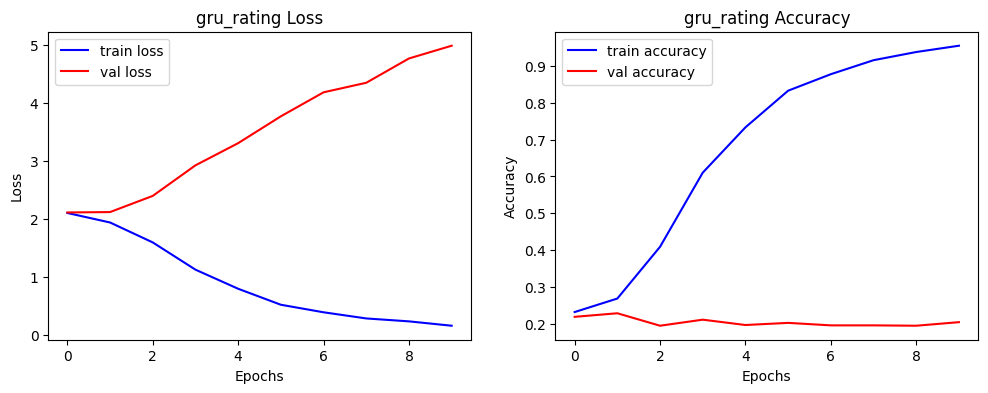

gru_rating Metrics:
Accuracy: 0.20463320463320464
Balanced Accuracy: 0.15470230465127882
F1 Score: 0.19748112354076583
ROC AUC: 0.5665934487798806
Precision: 0.1998708083970859
Recall: 0.20463320463320464
Confusion Matrix:
[[17  7  7  4  4  5 21 22  8 20]
 [ 1  2  1  3  3  3  3  6  3  8]
 [ 2  1  6  0  3  2  7 11  8  9]
 [ 6  0  1  4  0  2  9  8  2 12]
 [ 2  1  4  4  4  5 12 15  5 15]
 [ 6  1  2  3  0  7  7 10  7 15]
 [ 6  1  4  7  2  2 19 31 19 30]
 [11  2  1  8  7  8 25 51 27 50]
 [ 5  1  6  2  5  3 17 34 22 38]
 [ 8  5  3  6  1  8 22 53 40 80]]
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step


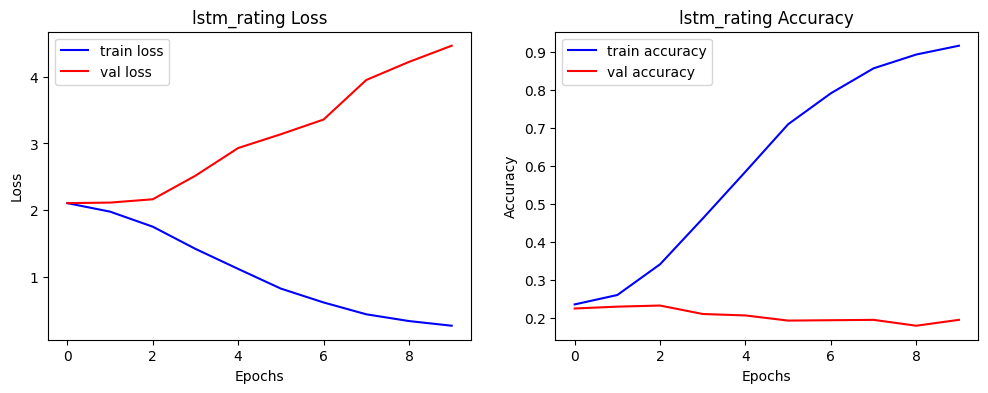

lstm_rating Metrics:
Accuracy: 0.19401544401544402
Balanced Accuracy: 0.15283976292487572
F1 Score: 0.1893833825282103
ROC AUC: 0.5629885872997279
Precision: 0.194503316124302
Recall: 0.19401544401544402
Confusion Matrix:
[[22  1 13  1  4  8 17 18 13 18]
 [ 5  1  1  4  1  3  3  5  3  7]
 [ 6  2  9  0  0  5  6  9  3  9]
 [ 8  0  0  3  0  3  6  5  5 14]
 [ 6  1  7  0  4  5 11 11  7 15]
 [ 9  1  4  0  1  7  8  9  5 14]
 [13  2  5  3  0  6 18 29 22 23]
 [21  0  4  1  6 11 25 43 41 38]
 [16  2  5  3  1  3 15 31 27 30]
 [11  1 12  2  2 12 26 43 50 67]]
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


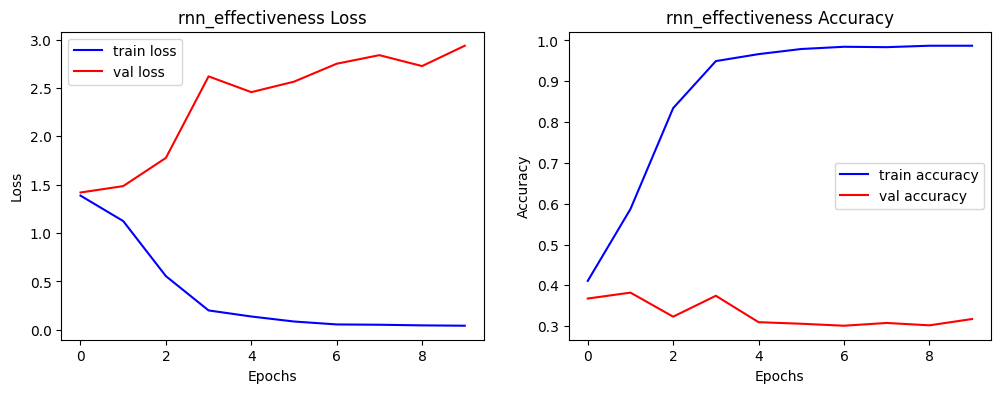

rnn_effectiveness Metrics:
Accuracy: 0.31756756756756754
Balanced Accuracy: 0.22032985971388852
F1 Score: 0.30887428315802185
ROC AUC: 0.5167763027051893
Precision: 0.30203162839439435
Recall: 0.31756756756756754
Confusion Matrix:
[[104 131  19  14  42]
 [142 183  27  11  48]
 [ 34  29   8   4   7]
 [ 27  37   3   1   8]
 [ 49  53  16   6  33]]
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


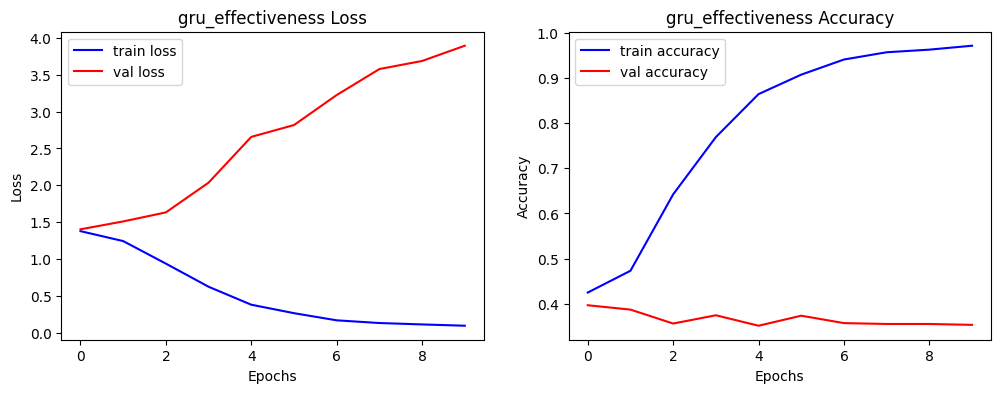

gru_effectiveness Metrics:
Accuracy: 0.3532818532818533
Balanced Accuracy: 0.26225051802776367
F1 Score: 0.34623763504649024
ROC AUC: 0.5579675294265226
Precision: 0.3465838105972701
Recall: 0.3532818532818533
Confusion Matrix:
[[123 119  19   6  43]
 [145 188  21   7  50]
 [ 34  24   9   5  10]
 [ 25  24   5   8  14]
 [ 47  59   9   4  38]]
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step


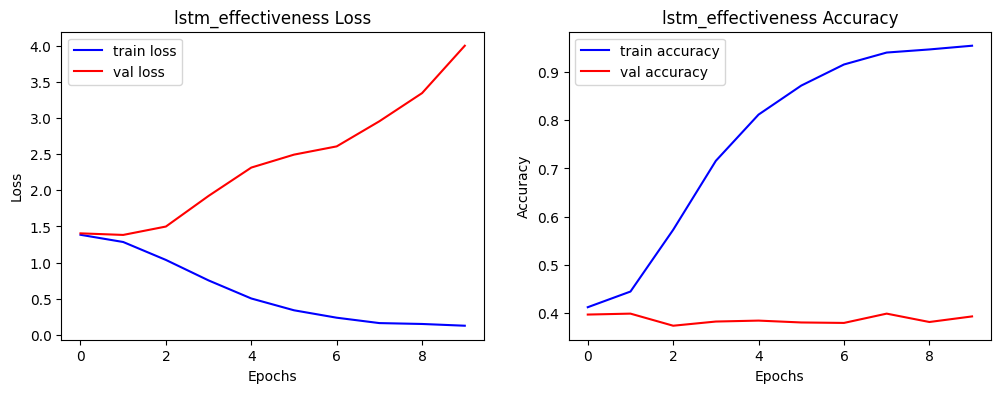

lstm_effectiveness Metrics:
Accuracy: 0.39285714285714285
Balanced Accuracy: 0.26447173954141234
F1 Score: 0.36839589271721884
ROC AUC: 0.5653342415950859
Precision: 0.3604062785371596
Recall: 0.39285714285714285
Confusion Matrix:
[[142 133   5   4  26]
 [138 226  11   5  31]
 [ 23  37   9   2  11]
 [ 23  40   3   2   8]
 [ 49  65   7   8  28]]


In [ ]:
results = {}
for rnn_mod, model in models.items():
    if 'rating' in rnn_mod:
        results[rnn_mod] = evaluate_model(model, X_test_pad, y_test_rating)
    else:
        results[rnn_mod] = evaluate_model(model, X_test_pad, y_test_effectiveness)

    plot_learning_curves(iteration_history[rnn_mod], rnn_mod)
    metrics = results[rnn_mod]
    print(f'{rnn_mod} Metrics:')
    print(f'Accuracy: {metrics[0]}')
    print(f'Balanced Accuracy: {metrics[1]}')
    print(f'F1 Score: {metrics[2]}')
    print(f'ROC AUC: {metrics[3]}')
    print(f'Precision: {metrics[4]}')
    print(f'Recall: {metrics[5]}')
    print(f'Confusion Matrix:\n{metrics[6]}')

##### Questions
##### 1. What Is An RNN?
##### 2. What type of RNN do you know?
##### 3. How Does An RNN Differ From Other Neural Networks (for example CNN or Feedforward Network)?
##### 4. What Is A Sequence-To-Sequence RNN?
##### 5. What is Long Short-Term Memory and LSTM cells?
##### 6. Pretraining and Fine-tuning in RNNs?
##### 7. What Is A Gated Recurrent Units?
##### 8. Main difficulties when training RNNs? How to overcome them?
##### 9. How many dimensions must the inputs of an RNN layer have? What kind of outputs, you'll receive as a result of processing?
##### 10. What evaluation metrics do you know? 
